In [315]:
# library & dataset
import pandas as pd
import numpy as np
import seaborn as sns


#Load the Excel data into a DataFrame object
excel_data_df = pd.ExcelFile('V02Max_Combined.xlsx')
temp_data = pd.read_excel('merged_athletes_data.xlsx')

sheet_kayaking = pd.read_excel(excel_data_df, sheet_name = 'Kayaking')
sheet_Athletes = pd.read_excel(excel_data_df, sheet_name ='Athletes')
sheet_Triathlon = pd.read_excel(excel_data_df, sheet_name ='Triathlon')
sheet_Fencing = pd.read_excel(excel_data_df, sheet_name ='Fencing')



42. What was the difference in heart rate between warm up and GET for athlete 1

45. Create a dummy array with no data with a size of 15.

In [183]:
dumArr = np.array(16)
print("Dummy array with no data with size :",dumArr)

Dummy array with no data with size : 16


50(A). Create a violin chart using any 2 columns in the dataset(using Fencing dataset)

<Axes: xlabel='RR', ylabel='power'>

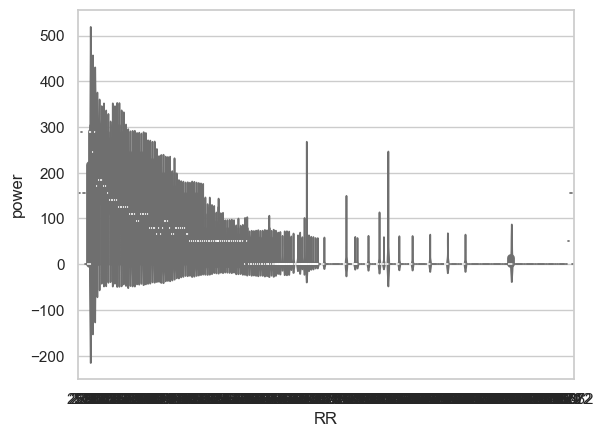

In [335]:
sns.set(style = 'whitegrid')
sns.violinplot(x= sheet_Fencing['RR'],y= sheet_Fencing['power'],palette="pastel")

In [ ]:
50(B). Create a violin chart using any 2 columns in the dataset ( random 50 rows)

<Axes: xlabel='RR', ylabel='power'>

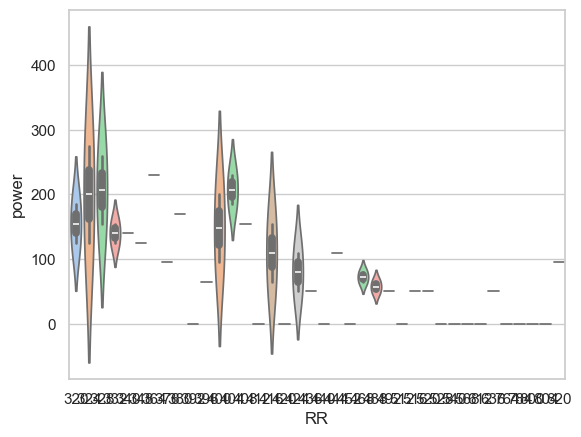

In [282]:
# Selecting 50 random rows and specific columns
random_rows= sheet_Fencing.sample(n=50).loc[:, ['RR', 'power']]
# use to set style of background of plot
sns.set(style = 'whitegrid')
sns.violinplot(x= random_rows['RR'],y= random_rows['power'],palette="pastel")


51(A). List every athlete’s V02 ml/kg - (The iterrows() function can be used to iterate over the DataFrame rows as (index, Series) pairs, which can then be used to create a list)

In [333]:
# Create an empty list
Row_list =[]

# Iterate over first 50 rows
for index, rows in temp_data.head(50).iterrows():
    # Create list for the current row
    my_list =[rows.VO2]
    
    # append the list to the final list
    Row_list.append(my_list)

# Print the list
print(Row_list)

[[0.302007609], [0.302007609], [0.301335742], [0.301335742], [0.301335742], [0.371173171], [0.371173171], [0.371173171], [0.410091179], [0.410091179], [0.410091179], [0.403671029], [0.403671029], [0.403671029], [0.405154495], [0.405154495], [0.405154495], [0.387334824], [0.387334824], [0.387334824], [0.367792864], [0.367792864], [0.367792864], [0.31583054], [0.31583054], [0.31583054], [0.310178484], [0.310178484], [0.310178484], [0.307939922], [0.307939922], [0.307939922], [0.31649763], [0.31649763], [0.31649763], [0.329339834], [0.329339834], [0.329339834], [0.333033454], [0.333033454], [0.333033454], [0.327401742], [0.327401742], [0.306693321], [0.306693321], [0.306693321], [0.290374669], [0.290374669], [0.290374669], [0.326006856]]


51(B). List every athlete’s V02 ml/kg - (In the below example, we use the values property to represent the DataFrame as a NumPy array and then convert it to a list using the tolist() function.)

In [331]:
list_of_50 = temp_data.iloc[:50] 
# Converting DataFrame to list using values property
list = list_of_50['VO2'].tolist()
print(list)


[0.302007609, 0.302007609, 0.301335742, 0.301335742, 0.301335742, 0.371173171, 0.371173171, 0.371173171, 0.410091179, 0.410091179, 0.410091179, 0.403671029, 0.403671029, 0.403671029, 0.405154495, 0.405154495, 0.405154495, 0.387334824, 0.387334824, 0.387334824, 0.367792864, 0.367792864, 0.367792864, 0.31583054, 0.31583054, 0.31583054, 0.310178484, 0.310178484, 0.310178484, 0.307939922, 0.307939922, 0.307939922, 0.31649763, 0.31649763, 0.31649763, 0.329339834, 0.329339834, 0.329339834, 0.333033454, 0.333033454, 0.333033454, 0.327401742, 0.327401742, 0.306693321, 0.306693321, 0.306693321, 0.290374669, 0.290374669, 0.290374669, 0.326006856]


In [ ]:
60.get the last letter of athletes last names using RegEX